(100,)


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


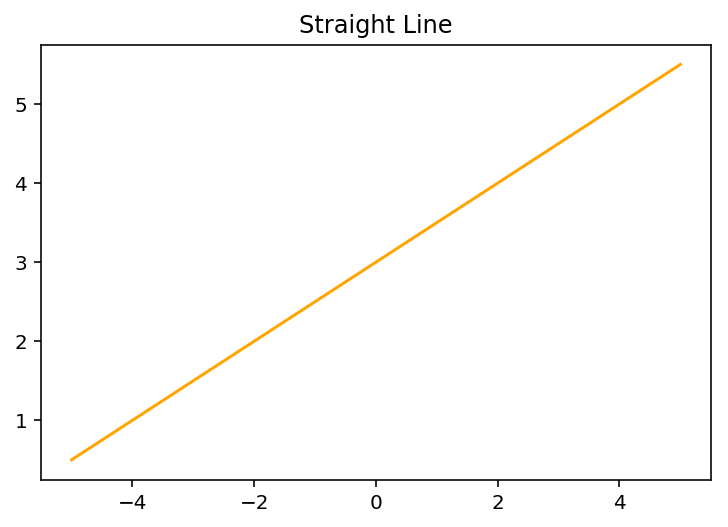

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
print(x.shape)
y = 0.5 * x + 3
plt.plot(x, y, c='orange')
plt.title('Straight Line')
plt.show()

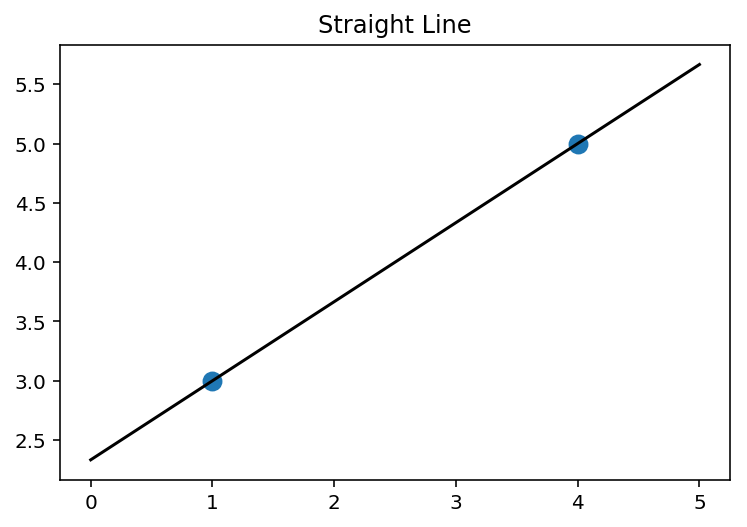

In [2]:
from sklearn.linear_model import LinearRegression

X = [[1], [4]]
y = [3, 5]

lr = LinearRegression().fit(X, y)
z = np.linspace(0, 5, 20)
plt.scatter(X, y, s=80)
plt.plot(z, lr.predict(z.reshape(-1, 1)), c='k')
plt.title('Straight Line')
plt.show()

直线的方程为：

In [3]:
print('\n\n\n直线方程为：')
print('==================\n')
print("y = {:.3f}".format(lr.coef_[0]), 'x', '+ {:.3f}'.format(lr.intercept_))
print('\n==================')
print('\n\n\n')




直线方程为：

y = 0.667 x + 2.333







Text(0.5, 1.0, 'Straight Line')

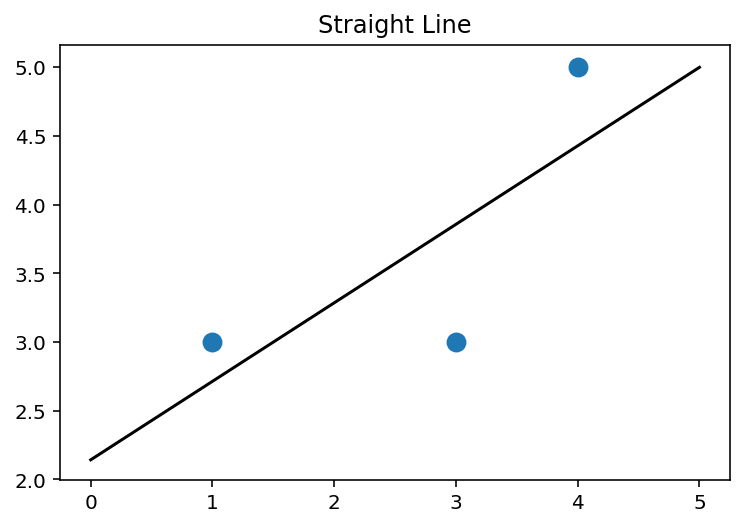

In [4]:
from sklearn.linear_model import LinearRegression

X = [[1], [4], [3]]
y = [3, 5, 3]
lr = LinearRegression().fit(X, y)
z = np.linspace(0, 5, 20)
plt.scatter(X, y, s=80)
plt.plot(z, lr.predict(z.reshape(-1, 1)), c='k')
plt.title('Straight Line')

### 生成回归分析的数据

In [5]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=50,
                       n_features=1,
                       n_informative=1,
                       noise=50,
                       random_state=1)

In [6]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

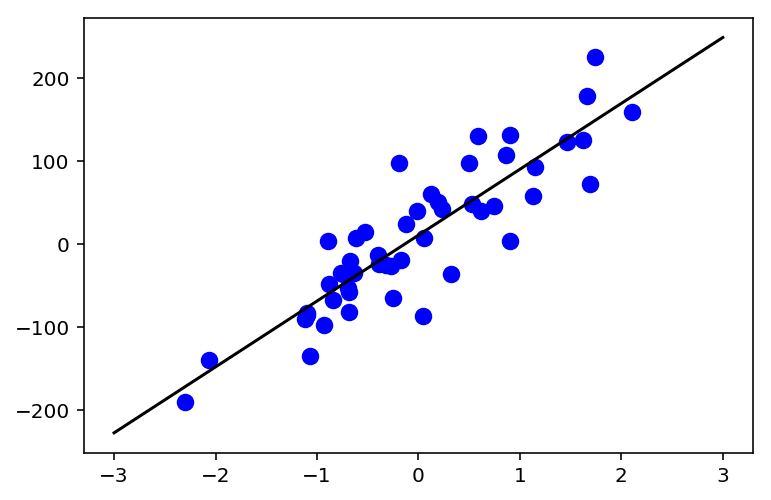

In [7]:
plt.scatter(X, y, c='b', s=60)
z = np.linspace(-3, 3, 100)
plt.plot(z, reg.predict(z.reshape(-1, 1)), c='k')
plt.show()

In [8]:
reg.coef_[0], reg.intercept_

(79.52463976255197, 10.922212258169349)

## 线性回归

## 使用假的数据集

In [9]:
X, y = make_regression(n_samples=100, n_features=2,
                       n_informative=2, random_state=38)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=8)

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
lr.coef_, lr.intercept_

(array([70.38592453,  7.43213621]), 3.552713678800501e-15)

得分是 1 ，这是因为没有给假的数据集添加噪声。

In [13]:
lr.score(X_train, y_train)

1.0

In [14]:
lr.score(X_test, y_test)

1.0

### 使用糖尿病数据集

In [15]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

lr = LinearRegression().fit(X_train, y_train)

print('训练数据集得分：{:.2f}'.format(lr.score(X_train, y_train)))
print('测试数据集得分：{:.2f}'.format(lr.score(X_test, y_test)))

训练数据集得分：0.53
测试数据集得分：0.46


## 岭回归

In [16]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

In [17]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print('岭回归训练数据集得分：{:.2f}'.format(ridge.score(X_train, y_train)))
print('岭回归测试数据集得分：{:.2f}'.format(ridge.score(X_test, y_test)))
print(ridge.coef_, ridge.intercept_)

岭回归训练数据集得分：0.43
岭回归测试数据集得分：0.43
[  36.8262072   -75.80823733  282.42652716  207.39314972   -1.46580263
  -27.81750835 -134.3740951    98.97724793  222.67543268  117.97255343] 152.553545058867


+ 岭回归会使得权重收缩，降低过拟合的风险

In [18]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print('岭回归训练数据集得分：{:.2f}'.format(ridge10.score(X_train, y_train)))
print('岭回归测试数据集得分：{:.2f}'.format(ridge10.score(X_test, y_test)))
print(ridge10.coef_, ridge10.intercept_)

岭回归训练数据集得分：0.15
岭回归测试数据集得分：0.16
[ 15.08676646  -1.9586191   60.69903425  47.11843221  14.72337546
   9.87779644 -35.56015266  35.74603575  54.27193163  37.42095846] 152.7585777843719


In [19]:
ridge01 = Ridge(alpha=.1).fit(X_train,y_train)
print('岭回归训练数据集得分：{:.2f}'.format(ridge01.score(X_train, y_train)))
print('岭回归测试数据集得分：{:.2f}'.format(ridge01.score(X_test, y_test)))
print(ridge01.coef_, ridge01.intercept_)

岭回归训练数据集得分：0.52
岭回归测试数据集得分：0.47
[  24.77802114 -228.33364296  495.54594378  361.21481169 -109.82542594
  -78.3286822  -190.69780344  108.24040795  383.72269392  107.42593373] 152.48093836963517


In [20]:
ridge001 = Ridge(alpha=.001).fit(X_train,y_train)
print('岭回归训练数据集得分：{:.2f}'.format(ridge001.score(X_train, y_train)))
print('岭回归测试数据集得分：{:.2f}'.format(ridge001.score(X_test, y_test)))
print(ridge001.coef_, ridge001.intercept_)

岭回归训练数据集得分：0.53
岭回归测试数据集得分：0.46
[  12.85505276 -280.75247234  535.16933232  401.27652209 -910.36586731
  529.25288813  127.79711283  188.67440312  712.73695893   91.55105434] 152.548294686494


[  36.8262072   -75.80823733  282.42652716  207.39314972   -1.46580263
  -27.81750835 -134.3740951    98.97724793  222.67543268  117.97255343]
[ 15.08676646  -1.9586191   60.69903425  47.11843221  14.72337546
   9.87779644 -35.56015266  35.74603575  54.27193163  37.42095846]
[  24.77802114 -228.33364296  495.54594378  361.21481169 -109.82542594
  -78.3286822  -190.69780344  108.24040795  383.72269392  107.42593373]
[   11.5106203   -282.51347161   534.20455671   401.73142674
 -1043.89718398   634.92464089   186.43262636   204.93373199
   762.47149733    91.9460394 ]


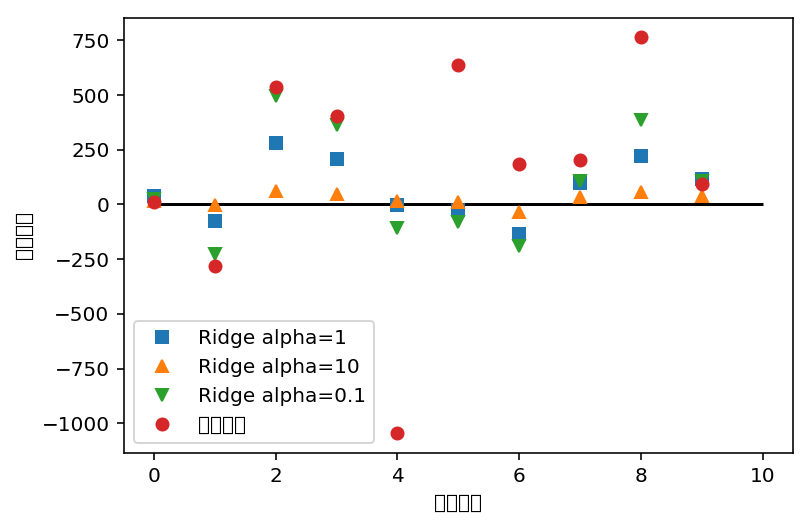

In [21]:
# plt.figure(figsize=(10, 8))
print(ridge.coef_)
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')  # 正方形

print(ridge10.coef_)
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')  # 上三角尖

print(ridge01.coef_)
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')  # 下三角尖

print(lr.coef_)
plt.plot(lr.coef_, 'o', label='线性回归')  # 下三角尖

# 画水平线 
plt.hlines(0,0,len(lr.coef_))
plt.xlabel('系数序号')
plt.ylabel('系数量级')

plt.legend(loc='best')

### 绘制学习曲线

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


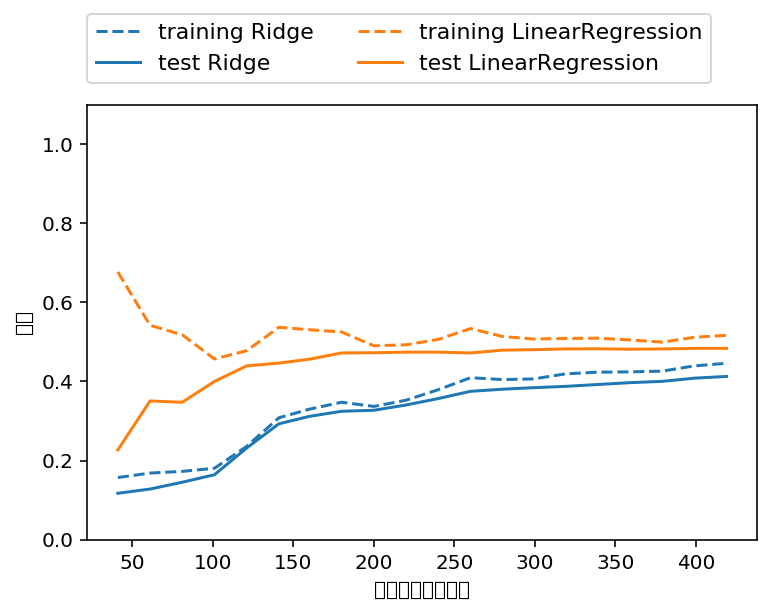

In [22]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold


def plot_learning_curve(est, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        est, X, y, train_sizes=np.linspace(0.1, 1, 20), cv=KFold(20, shuffle=True))
    estimator_name = est.__class__.__name__
    line = plt.plot(train_sizes, train_scores.mean(axis=1),
                    '--', label='training ' + estimator_name)

    plt.plot(train_sizes, test_scores.mean(axis=1), '-',
             label='test ' + estimator_name, c=line[0].get_color())
    plt.xlabel('训练数据集的数量')
    plt.ylabel('得分')
    plt.ylim(0, 1.1)
    
plot_learning_curve(Ridge(alpha=1), X, y)
plot_learning_curve(LinearRegression(), X, y)
plt.legend(loc=(0, 1.05), ncol=2, fontsize=11)
plt.show()